In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from tqdm import tqdm

In [2]:
class Gambler:
    def __init__(self, goal=100, prob_head=0.4, gamma=1, theta=1e-10):
        self.goal = goal
        self.prob_head = prob_head
        self.gamma = gamma
        self.theta = theta

    def reset(self):
        self.states = np.arange(self.goal + 1)
        self.rewards = np.zeros(self.goal + 1)
        self.rewards[self.goal] = 1.0
        self.state_values = np.zeros(self.goal + 1)
        self.policy = np.zeros(self.goal+1)
        self.sweeps = []

    def get_action_space(self, state):
        return np.arange(min(state, self.goal - state) + 1)

    def step(self, state):
        action_values = []
        for action in self.get_action_space(state):
            action_values.append(self.prob_head * (self.rewards[state + action] + self.gamma * self.state_values[state + action])
                                 + (1 - self.prob_head) * (self.rewards[state - action] + self.gamma * self.state_values[state - action]))
        return action_values

    def value_iteration(self):
        while True:
            delta = 0
            for state in self.states[1:self.goal]: # 1~99
                old_value = self.state_values[state]
                self.state_values[state] = np.max(self.step(state))
                delta = max(delta, abs(old_value - self.state_values[state]))
            self.sweeps.append(self.state_values.copy())
            if delta < self.theta:
                break
        for state in self.states[1:self.goal]:
            action_values = self.step(state)
            self.policy[state] = np.argmax(np.round(action_values[1:], 5)) + 1 # ingore noise
        return self.sweeps, self.policy


In [3]:
def example_4_3():
    gambler_example = Gambler()
    gambler_example.reset()
    sweeps, policy = gambler_example.value_iteration()
    return gambler_example.goal, gambler_example.states, sweeps, policy

def exercise_4_9(prob):
    gambler_example = Gambler(prob_head=prob)
    gambler_example.reset()
    sweeps, policy = gambler_example.value_iteration()
    return gambler_example.goal, gambler_example.states, sweeps, policy

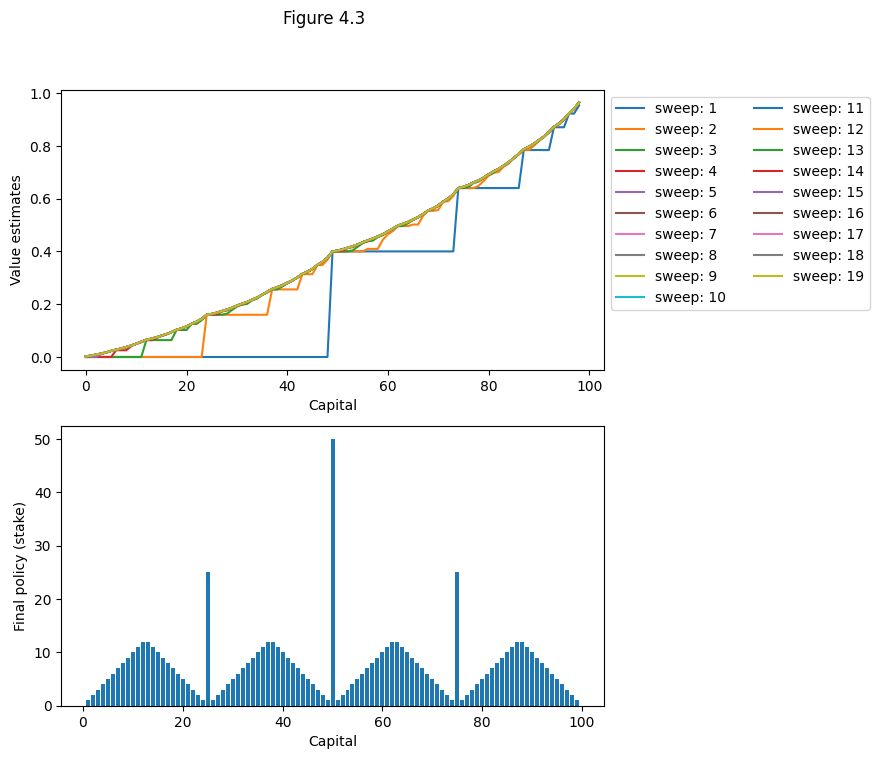

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(7, 8))
goal, states, sweeps_example, policy_example = example_4_3()

for i, sweep in enumerate(sweeps_example):
    ax[0].plot(sweep[1:goal], label='sweep: {}'.format(i + 1))
ax[0].set_xlabel('Capital')
ax[0].set_ylabel('Value estimates')
ax[0].legend(bbox_to_anchor=(1, 1), ncol=2)

ax[1].bar(states[1:goal], policy_example[1:goal])
ax[1].set_xlabel('Capital')
ax[1].set_ylabel('Final policy (stake)')
plt.suptitle('Figure 4.3')
plt.show()

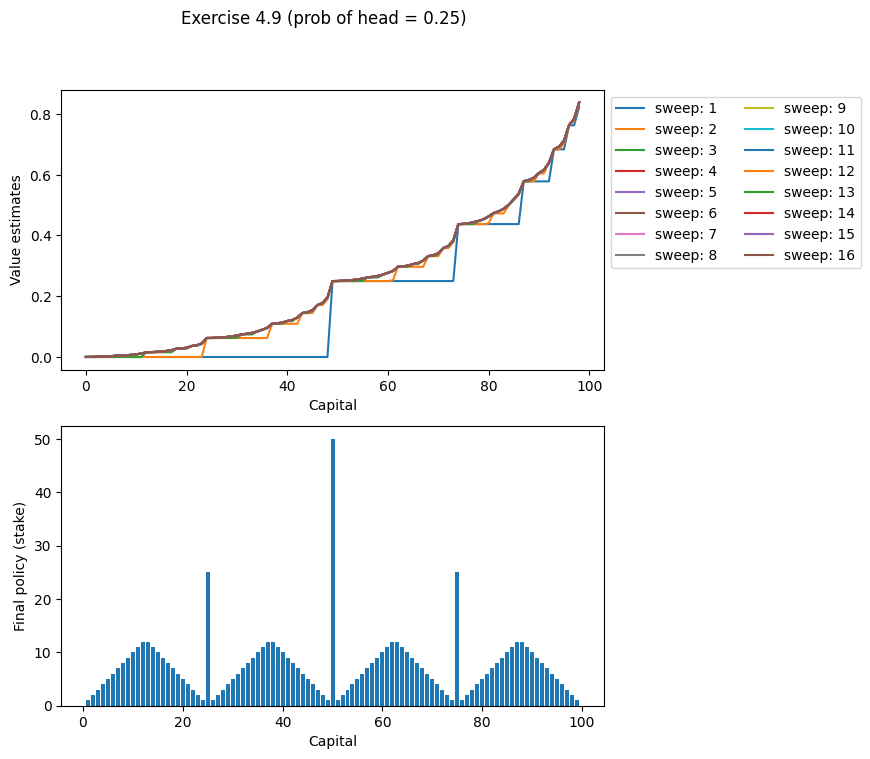

In [5]:
PROB = 0.25
fig, ax = plt.subplots(2, 1, figsize=(7, 8))
goal, states, sweeps_exercise, policy_exercise = exercise_4_9(PROB)

for i, sweep in enumerate(sweeps_exercise):
    ax[0].plot(sweep[1:goal], label='sweep: {}'.format(i + 1))
ax[0].set_xlabel('Capital')
ax[0].set_ylabel('Value estimates')
ax[0].legend(bbox_to_anchor=(1, 1), ncol=2)

ax[1].bar(states[1:goal], policy_exercise[1:goal])
ax[1].set_xlabel('Capital')
ax[1].set_ylabel('Final policy (stake)')
plt.suptitle('Exercise 4.9 (prob of head = {})'.format(PROB))
plt.show()